# Importing of Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objs as go
import plotly.graph_objs as go
import plotly.offline as pyoff
%matplotlib inline
sns.set()

# Data Processing And Cleaning

In [79]:
df=pd.read_csv('agricultural_raw_material.csv')
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [80]:
#Checking Null Values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [81]:
#Filling na values
df.fillna(method='ffill',inplace=True)

In [82]:
#Creating Year Column
df['Year']=df['Month']
for i in range(len(df)):
    df['Year'][i]=df['Month'][i][-2:]

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
#Improving data of year column
for i in range(117):
    df['Year'][i]='19'+df['Year'][i]

for i in range(117,361):
    df['Year'][i]='20'+df['Year'][i]

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
#Extracting the month data
for i in range(len(df)):
    df['Month'][i]=df['Month'][i][:-3]

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df.fillna(0,inplace=True)

In [86]:
df.dtypes

Month                            object
Coarse wool Price                object
Coarse wool price % Change       object
Copra Price                      object
Copra price % Change             object
Cotton Price                    float64
Cotton price % Change            object
Fine wool Price                  object
Fine wool price % Change         object
Hard log Price                  float64
Hard log price % Change          object
Hard sawnwood Price             float64
Hard sawnwood price % Change     object
Hide Price                      float64
Hide price % change              object
Plywood Price                   float64
Plywood price % Change           object
Rubber Price                    float64
Rubber price % Change            object
Softlog Price                   float64
Softlog price % Change           object
Soft sawnwood Price             float64
Soft sawnwood price % Change     object
Wood pulp Price                 float64
Wood pulp price % Change         object


In [87]:
#Converting into numeric by removing special character
cols=['Fine wool Price','Coarse wool Price','Copra Price']
for col in cols:
    for i in range(len(df[col])):
        x=re.sub(',','',df[col][i])
        x=pd.to_numeric(x)
        df[col][i]=x

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
#Converting column to float
for col in cols:
    df[col]=df[col].astype(float)

In [90]:
names=df.columns
for name in names:
    if '%' in name:
        for i in range(len(df[name])):
            df[name][i]=df[name][i][:-1]

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
df.replace('',0,inplace=True)

In [92]:
names=df.columns
for name in names:
    if '%' in name:
        df[name]=df[name].astype(float)

In [94]:
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [95]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,Year
0,Apr,482.34,0.00,236.0,0.00,1.83,0.00,1071.63,0.00,161.20,...,0.00,0.84,0.00,120.66,0.00,218.76,0.00,829.29,0.00,1990
1,May,447.26,-7.27,234.0,-0.85,1.89,3.28,1057.18,-1.35,172.86,...,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59,1990
2,Jun,440.99,-1.40,216.0,-7.69,1.99,5.29,898.24,-15.03,181.67,...,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32,1990
3,Jul,418.44,-5.11,205.0,-5.09,2.01,1.01,895.83,-0.27,187.96,...,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91,1990
4,Aug,418.44,0.00,198.0,-3.41,1.79,-10.95,951.22,6.18,186.13,...,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49,1990


# Analysis

In [61]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,Year
0,Apr,482.34,0.00,236.0,0.00,1.83,0.00,1071.63,0.00,161.20,...,0.00,0.84,0.00,120.66,0.00,218.76,0.00,829.29,0.00,1990
1,May,447.26,-7.27,234.0,-0.85,1.89,3.28,1057.18,-1.35,172.86,...,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59,1990
2,Jun,440.99,-1.40,216.0,-7.69,1.99,5.29,898.24,-15.03,181.67,...,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32,1990
3,Jul,418.44,-5.11,205.0,-5.09,2.01,1.01,895.83,-0.27,187.96,...,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91,1990
4,Aug,418.44,0.00,198.0,-3.41,1.79,-10.95,951.22,6.18,186.13,...,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49,1990


In [62]:
#Year wise total price of each crop
cols=[]
for col in df.columns:
    if(('%' not in col)):
        cols.append(col)
year_wise_price=pd.DataFrame(df.groupby("Year")[cols].sum())
year_wise_price

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Year,,,,,,,,,,,,
1990,3677.03,1956.00,16.76,8471.88,1615.06,4514.08,825.96,3312.63,7.86,1129.26,1861.54,7254.46
1991,3949.26,3437.00,20.14,8033.78,2297.81,6297.12,953.40,4468.52,9.91,1508.03,2594.08,7161.57
1992,4094.37,4565.00,15.34,7200.97,2514.10,7286.55,910.36,4569.14,10.33,1829.58,2815.73,6755.41
1993,3836.75,3545.00,15.37,5559.08,4677.69,9098.91,960.35,7937.12,9.97,2615.22,3329.30,5086.93
1994,4795.03,5008.00,21.16,8943.92,3690.59,9857.30,1041.77,7213.96,13.51,2414.77,3594.63,6629.55
1995,5965.72,5262.00,25.56,9303.73,3067.44,8882.28,1057.66,7013.23,18.95,2326.07,3607.39,10241.44
1996,5146.54,5867.00,21.28,7819.03,3025.21,8890.63,1047.86,6354.34,16.72,2448.87,3718.97,6889.42
1997,5313.52,5205.00,20.97,9118.13,2859.03,7947.94,1059.03,5819.50,12.22,2223.66,3529.53,6678.02
1998,4036.66,4933.00,17.34,6633.77,1949.11,5809.87,920.32,4512.64,8.64,1909.22,3357.77,6101.21


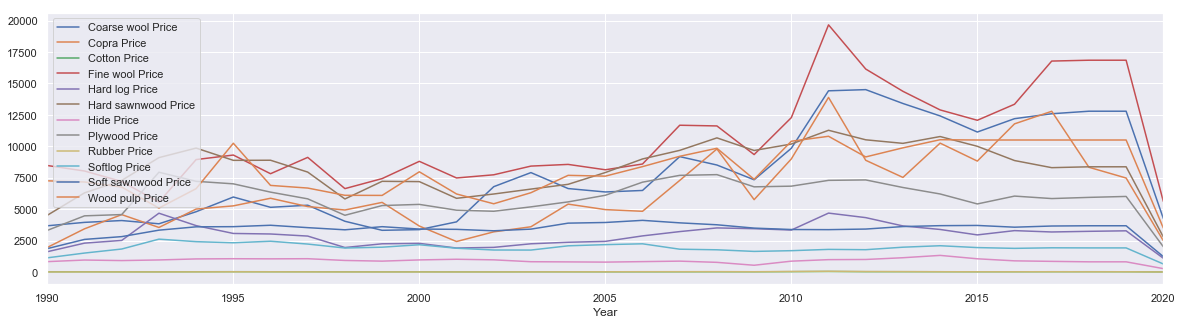

In [63]:
#Plot to depict how price of each crop changes each year
year_wise_price.plot(figsize=(20,5))

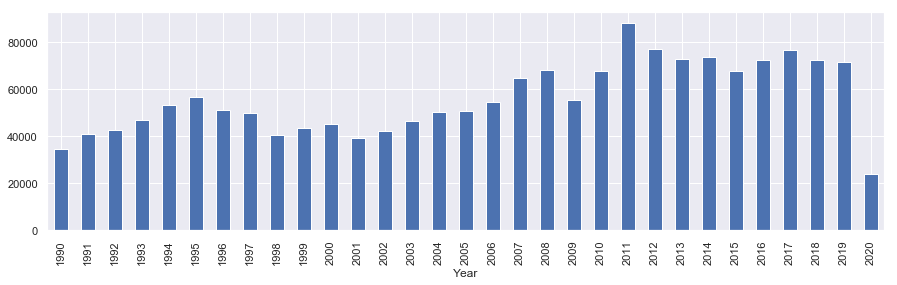

In [64]:
#Plot to depict total money spent on each year
plt.figure(figsize=(15,4))
x=year_wise_price.sum(axis=1)
x.plot(kind='bar')

In [65]:
#Crop price sum month wise
month_wise_price=pd.DataFrame(df.groupby("Month")[cols].sum())
month_wise_price

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Month,,,,,,,,,,,,
Apr,21199.71,17350.00,53.22,28924.45,7753.21,21870.93,2463.16,15751.70,53.71,5042.35,9022.29,21596.34
Aug,19773.64,15679.25,47.42,26537.01,7672.45,21391.81,2333.65,15319.78,47.69,4891.06,8723.79,21078.45
Dec,19638.31,16705.00,48.30,26546.91,7341.15,20989.59,2268.87,15098.97,47.74,4811.21,8697.26,20844.01
Feb,20552.73,17132.75,50.90,27445.84,7416.64,20995.74,2255.58,15257.77,53.07,5001.69,8652.62,20541.38
Jan,20228.61,16970.00,49.65,27525.57,7347.74,20881.66,2245.07,15074.04,50.74,5001.83,8697.33,20744.39
Jul,20252.52,16162.50,48.73,26916.46,7652.18,21347.75,2342.82,15285.93,48.83,4858.77,8864.68,21148.55
Jun,20341.64,16690.50,49.67,27518.81,7670.83,21441.95,2358.62,15361.92,50.73,4927.73,8873.75,21066.69
Mar,20694.87,16763.67,51.70,27650.14,7470.22,21032.78,2323.99,15391.12,51.95,4986.20,8722.27,20513.97
May,20100.08,16832.55,50.54,27774.35,7617.62,21511.79,2382.26,15277.82,51.91,4934.09,8850.25,20906.45


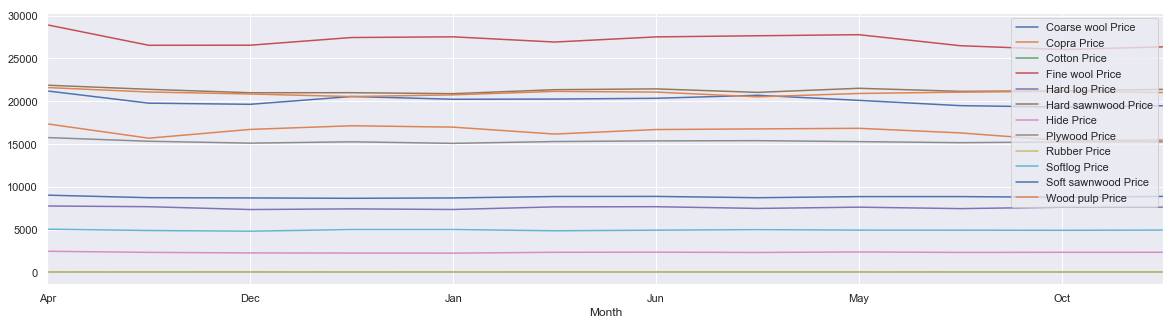

In [66]:
#Plot of crops price month wise
month_wise_price.plot(figsize=(20,5))

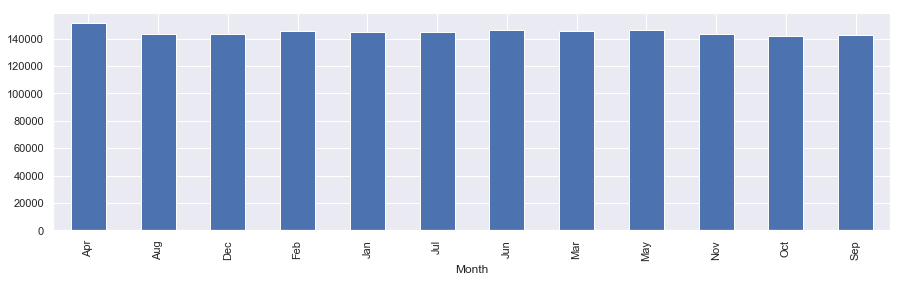

In [67]:
#Money spent in each month 
plt.figure(figsize=(15,4))
x=month_wise_price.sum(axis=1)
x.plot(kind='bar')

In [68]:
#Most expensive crops of each year
pd.DataFrame(year_wise_price.idxmax(axis=1),columns=['Crop'])

,Crop
Year,
1990,Fine wool Price
1991,Fine wool Price
1992,Hard sawnwood Price
1993,Hard sawnwood Price
1994,Hard sawnwood Price
1995,Wood pulp Price
1996,Hard sawnwood Price
1997,Fine wool Price
1998,Fine wool Price


In [69]:
cols=cols[1:-1]
cols

['Coarse wool Price',
 'Copra Price',
 'Cotton Price',
 'Fine wool Price',
 'Hard log Price',
 'Hard sawnwood Price',
 'Hide Price',
 'Plywood Price',
 'Rubber Price',
 'Softlog Price',
 'Soft sawnwood Price',
 'Wood pulp Price']

<Figure size 1440x360 with 0 Axes>

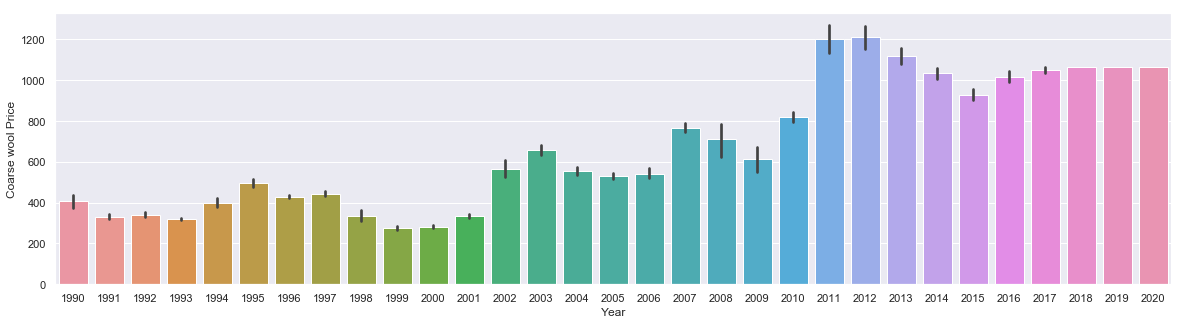

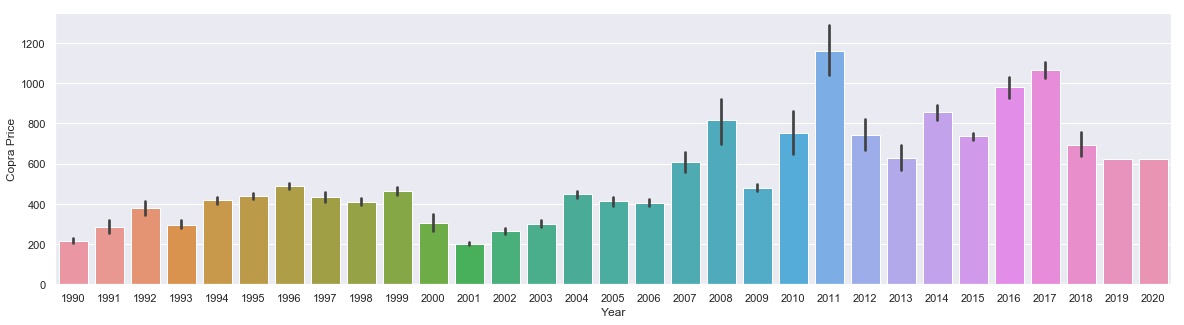

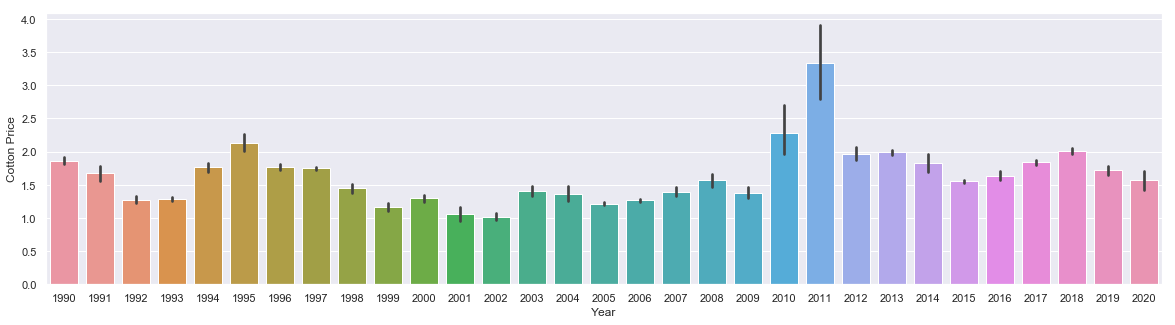

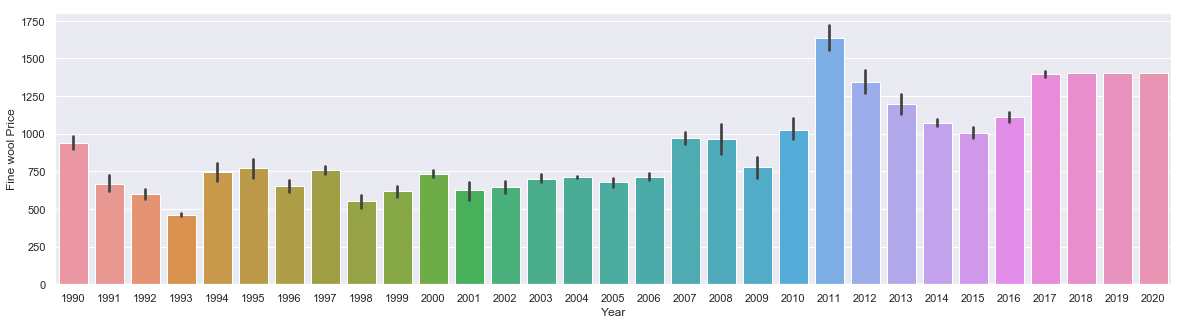

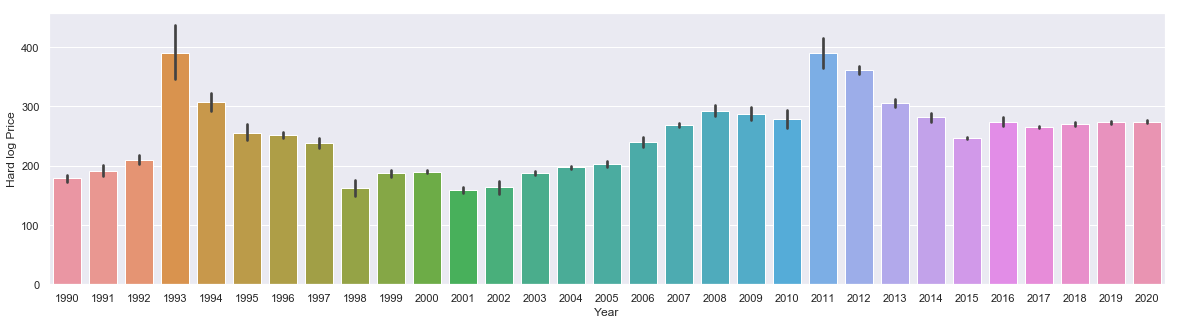

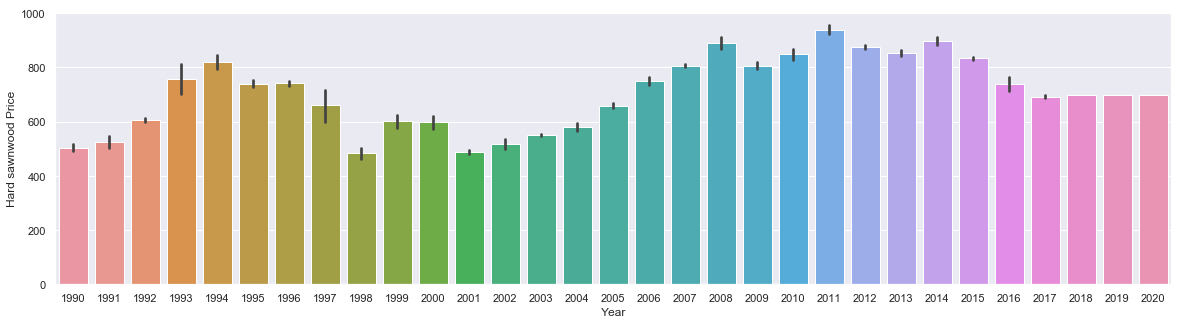

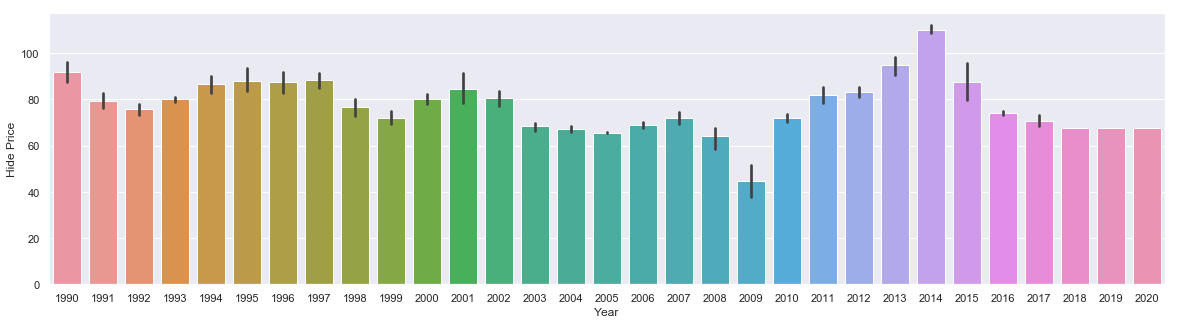

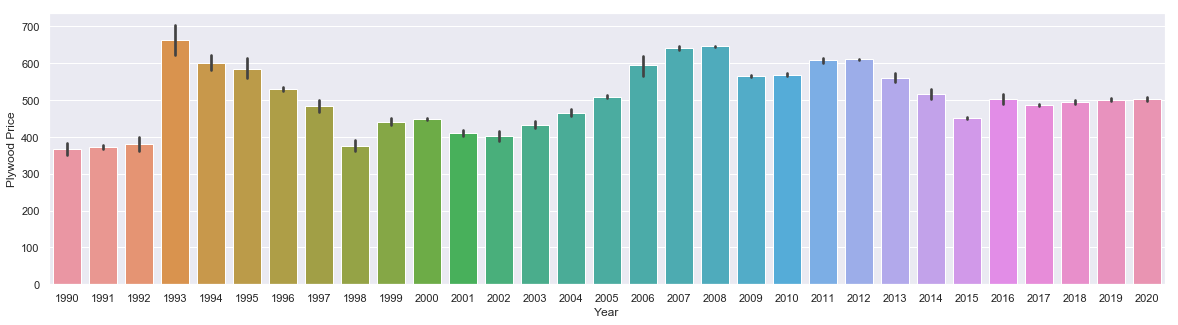

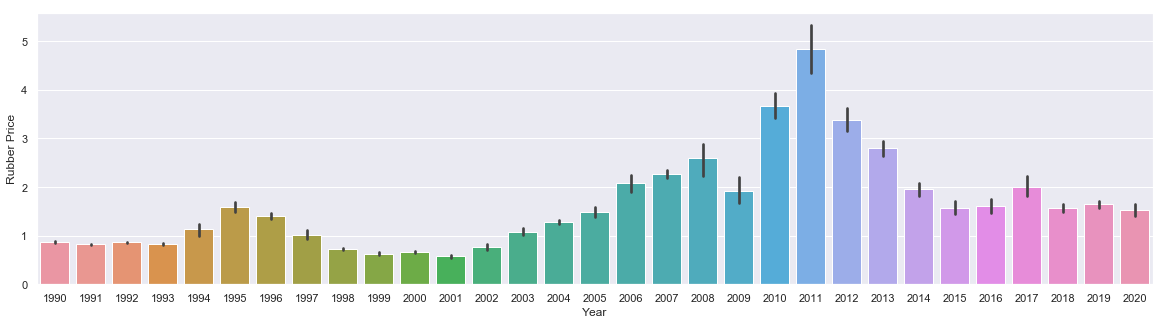

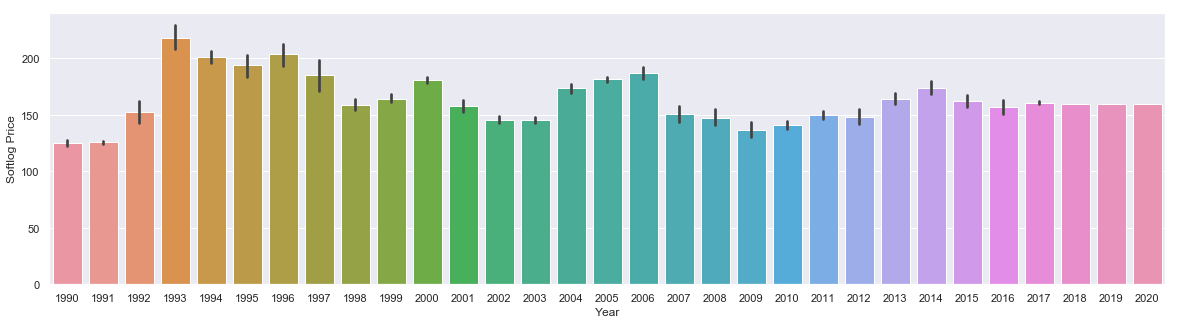

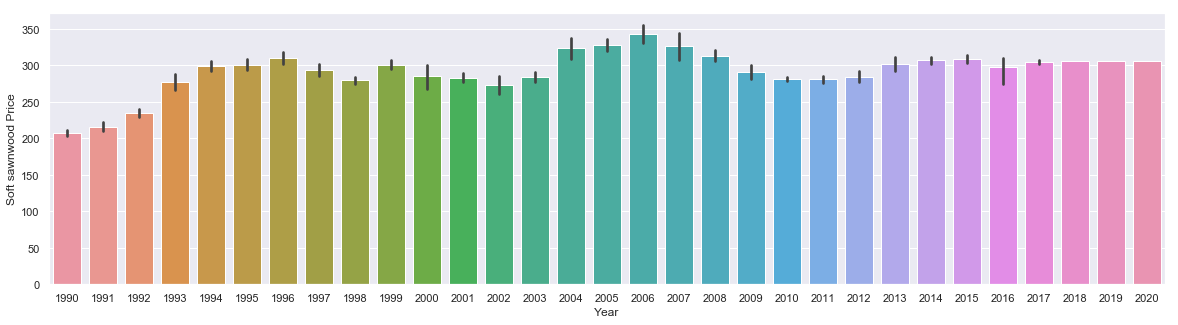

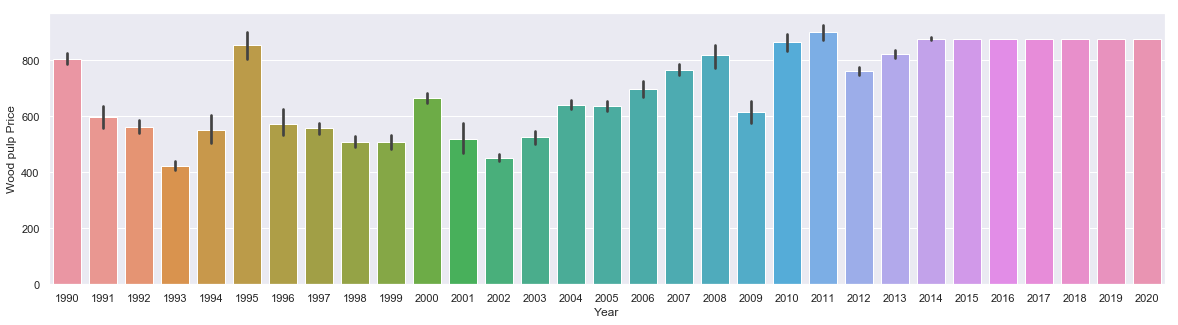

In [70]:
#Change of price of each crop every year
plt.figure(figsize=(20,5))
for col in cols:
    plt.figure(figsize=(20,5))
    sns.barplot(df['Year'],df[col])
    plt.ylabel(str(col))
    plt.show()

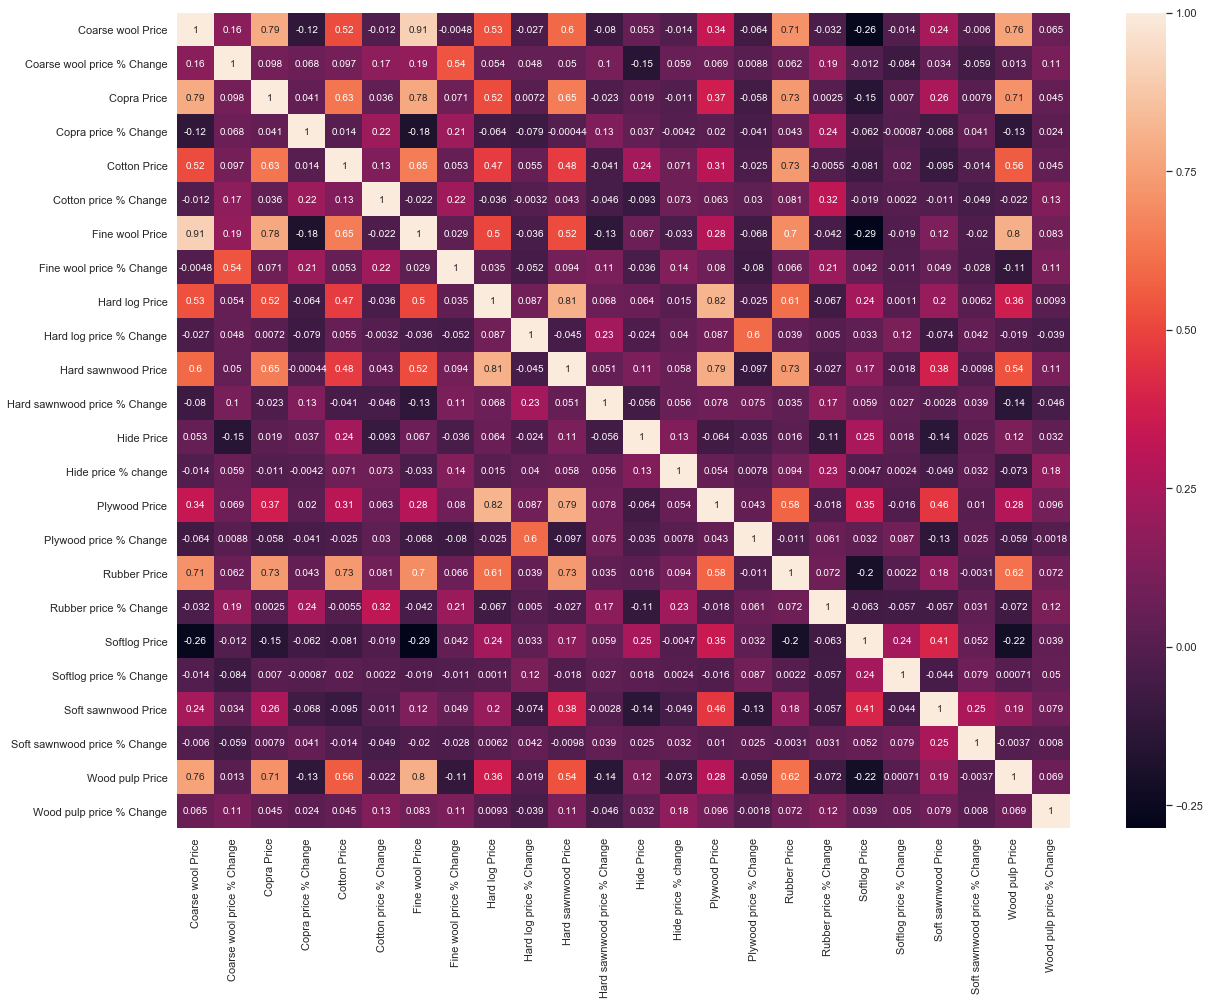

In [71]:
#Correlating matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [72]:
#Finding columns with high correaltion
corr_={}
for col in cols:
    #print(col)
    X=df.drop(col,axis=1)
    Y=df[col]
    x=X.corrwith(Y)
    x=x[x>0.5]
    corr_.setdefault(col, [])
    for n in x.index:
        corr_[col].append(n)

In [73]:
corr_

{'Coarse wool Price': ['Copra Price',
  'Cotton Price',
  'Fine wool Price',
  'Hard log Price',
  'Hard sawnwood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Copra Price': ['Coarse wool Price',
  'Cotton Price',
  'Fine wool Price',
  'Hard log Price',
  'Hard sawnwood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Cotton Price': ['Coarse wool Price',
  'Copra Price',
  'Fine wool Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Fine wool Price': ['Coarse wool Price',
  'Copra Price',
  'Cotton Price',
  'Hard log Price',
  'Hard sawnwood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Hard log Price': ['Coarse wool Price',
  'Copra Price',
  'Fine wool Price',
  'Hard sawnwood Price',
  'Plywood Price',
  'Rubber Price'],
 'Hard sawnwood Price': ['Coarse wool Price',
  'Copra Price',
  'Fine wool Price',
  'Hard log Price',
  'Plywood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Hide Price': [],
 'Plywood Price': ['Hard log Price', 'Hard sawnwood Price', 'Rubber Price

In [74]:
#Removing empty list
def new_s(s):
    return {a:(b if not isinstance(b, dict) else new_s(b)) for a, b in s.items() if b}

corr_=new_s(corr_)
corr_

{'Coarse wool Price': ['Copra Price',
  'Cotton Price',
  'Fine wool Price',
  'Hard log Price',
  'Hard sawnwood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Copra Price': ['Coarse wool Price',
  'Cotton Price',
  'Fine wool Price',
  'Hard log Price',
  'Hard sawnwood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Cotton Price': ['Coarse wool Price',
  'Copra Price',
  'Fine wool Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Fine wool Price': ['Coarse wool Price',
  'Copra Price',
  'Cotton Price',
  'Hard log Price',
  'Hard sawnwood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Hard log Price': ['Coarse wool Price',
  'Copra Price',
  'Fine wool Price',
  'Hard sawnwood Price',
  'Plywood Price',
  'Rubber Price'],
 'Hard sawnwood Price': ['Coarse wool Price',
  'Copra Price',
  'Fine wool Price',
  'Hard log Price',
  'Plywood Price',
  'Rubber Price',
  'Wood pulp Price'],
 'Plywood Price': ['Hard log Price', 'Hard sawnwood Price', 'Rubber Price'],
 'Rubber Price'

In [75]:
cols=list(corr_.keys())
cols

['Coarse wool Price',
 'Copra Price',
 'Cotton Price',
 'Fine wool Price',
 'Hard log Price',
 'Hard sawnwood Price',
 'Plywood Price',
 'Rubber Price',
 'Wood pulp Price']

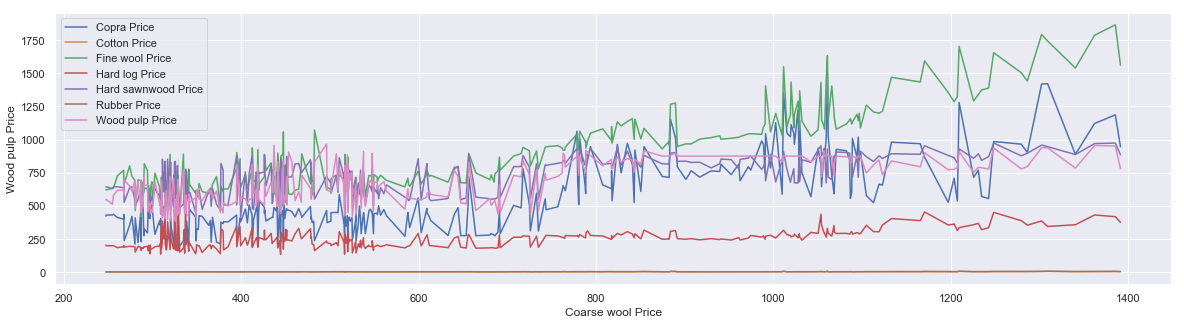

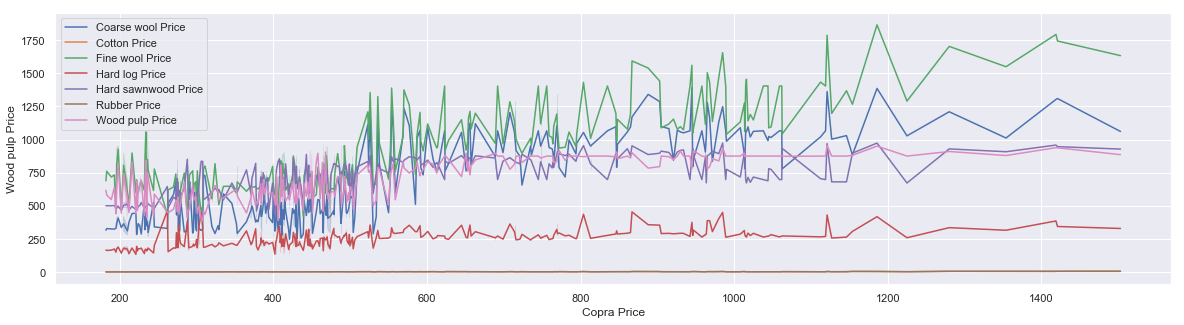

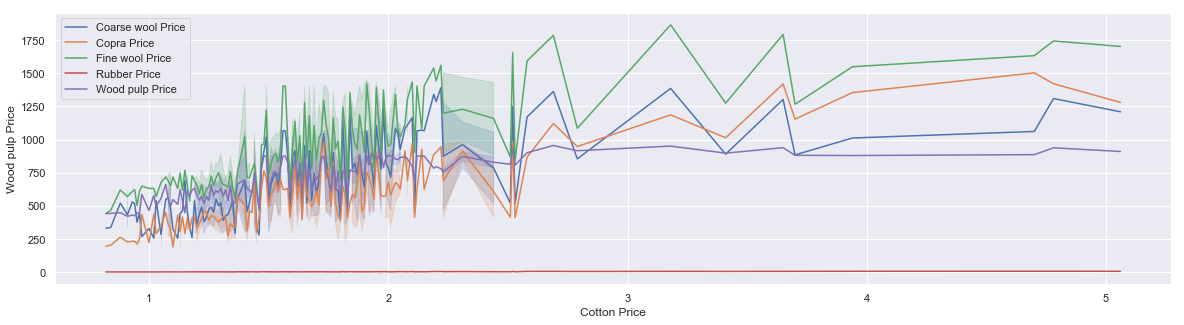

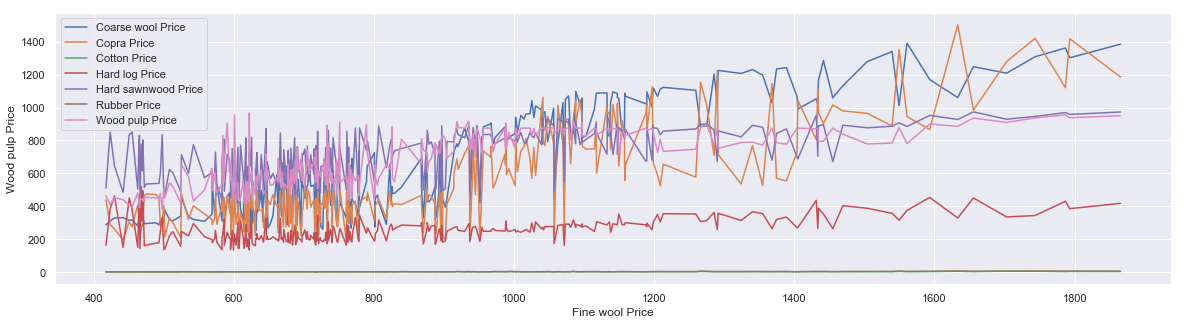

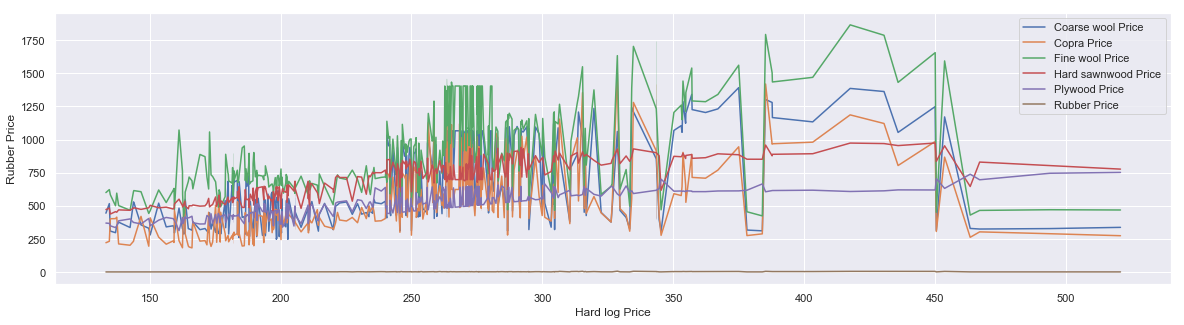

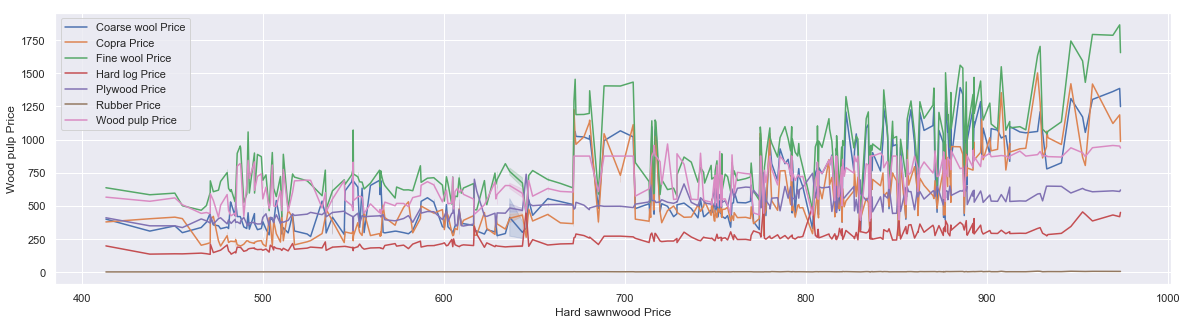

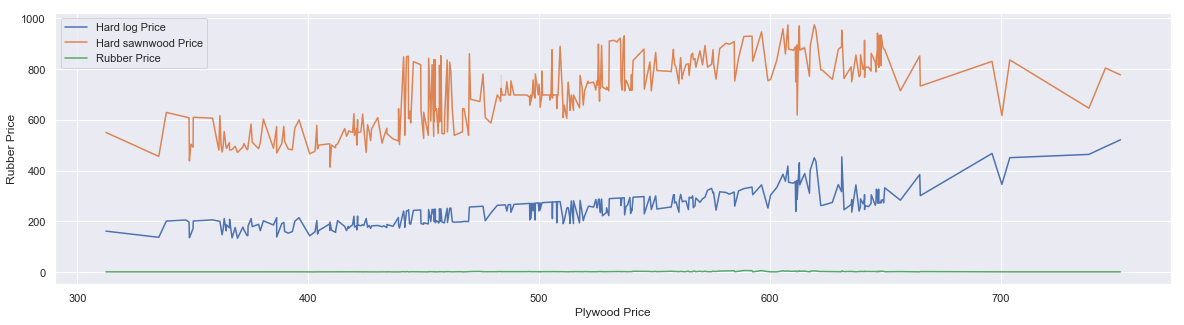

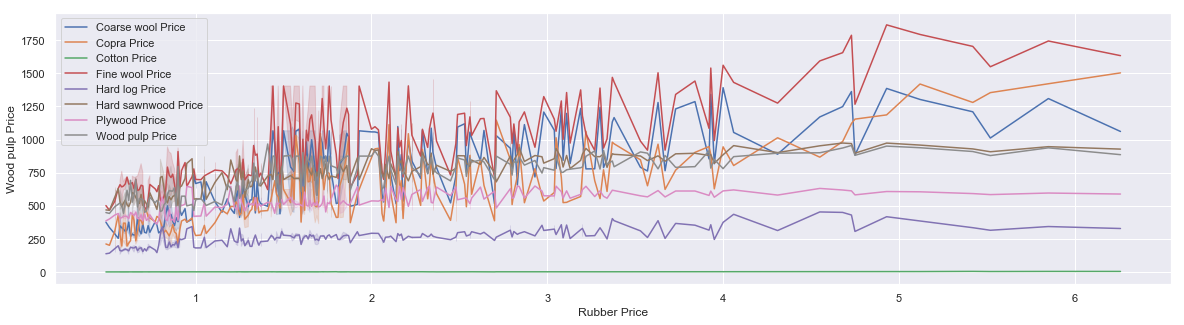

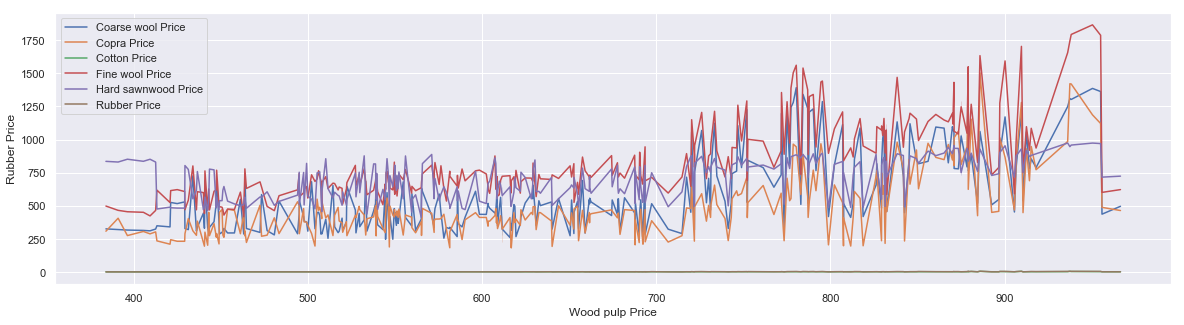

In [76]:
#ploting columns against its highly correlated columns
dict_col={}
for i in range(len(corr_)):
    dict_col[i]=df.loc[:,corr_[cols[i]]].columns

for i in range(len(dict_col)):
    plt.figure(figsize=(20,5))
    for col in dict_col[i]:
        sns.lineplot(df[cols[i]],y=df[col],label=str(col))

    plt.show()  


In [77]:
cols2=[]
for col in df.columns:
    if(('%' in col)):
        cols2.append(col)
cols2

['Coarse wool price % Change',
 'Copra price % Change',
 'Cotton price % Change',
 'Fine wool price % Change',
 'Hard log price % Change',
 'Hard sawnwood price % Change',
 'Hide price % change',
 'Plywood price % Change',
 'Rubber price % Change',
 'Softlog price % Change',
 'Soft sawnwood price % Change',
 'Wood pulp price % Change']

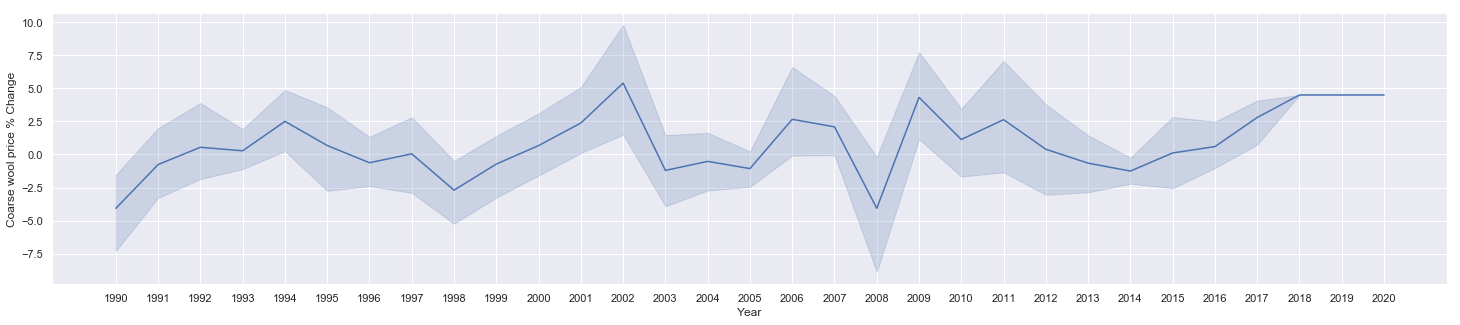

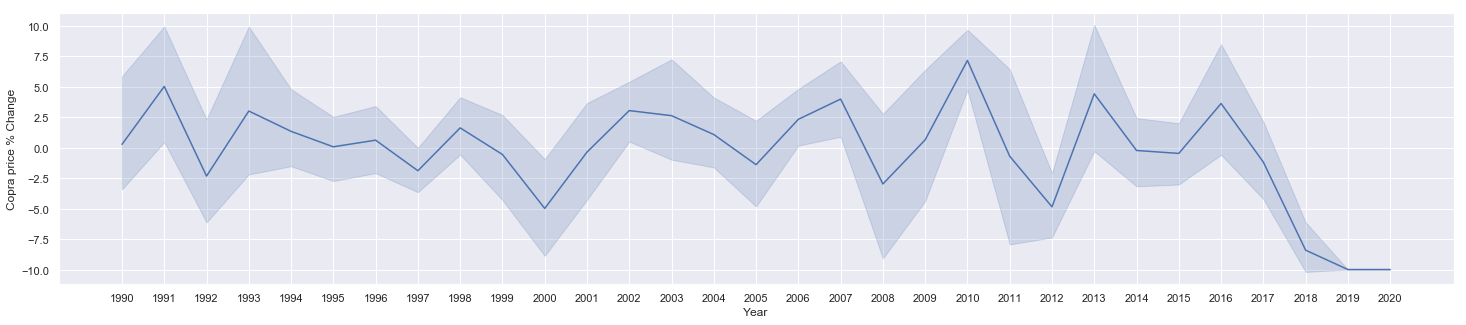

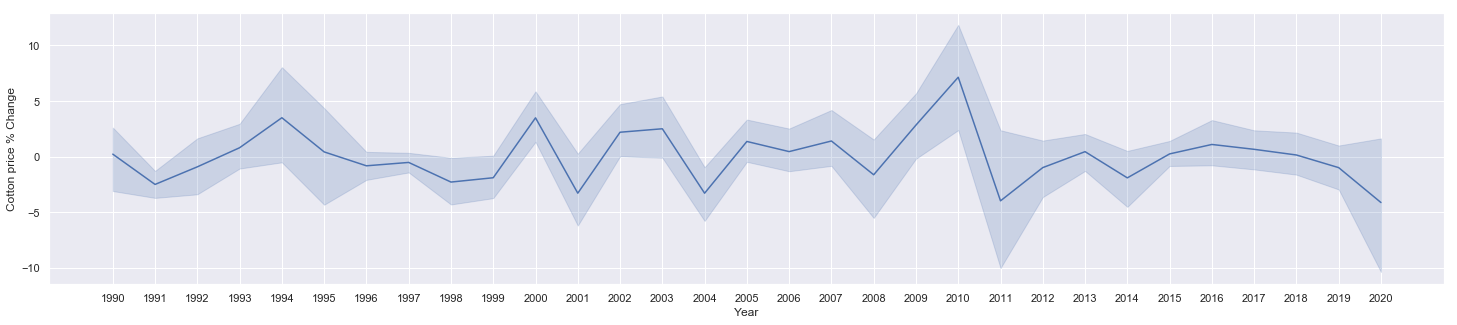

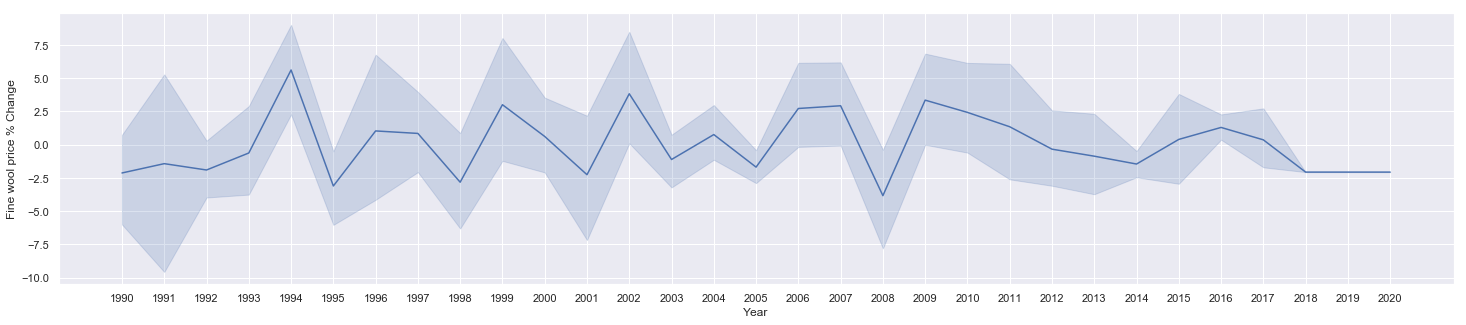

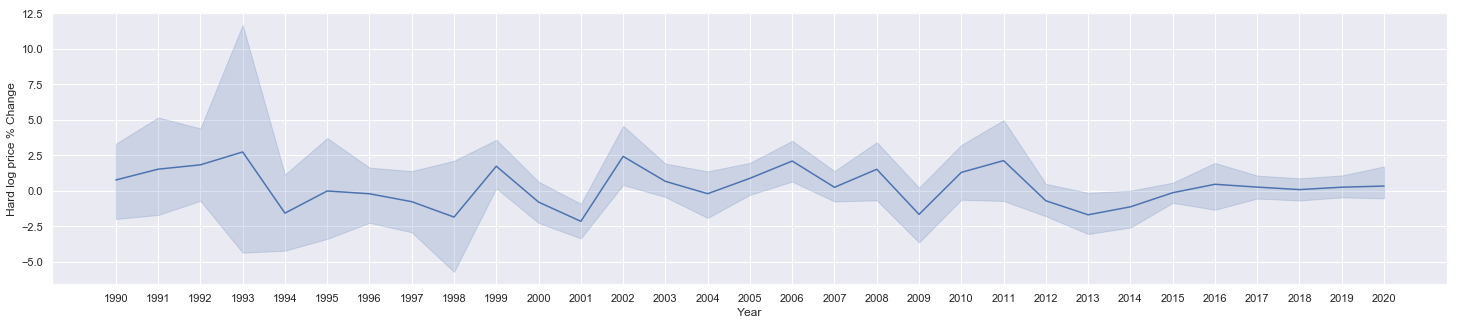

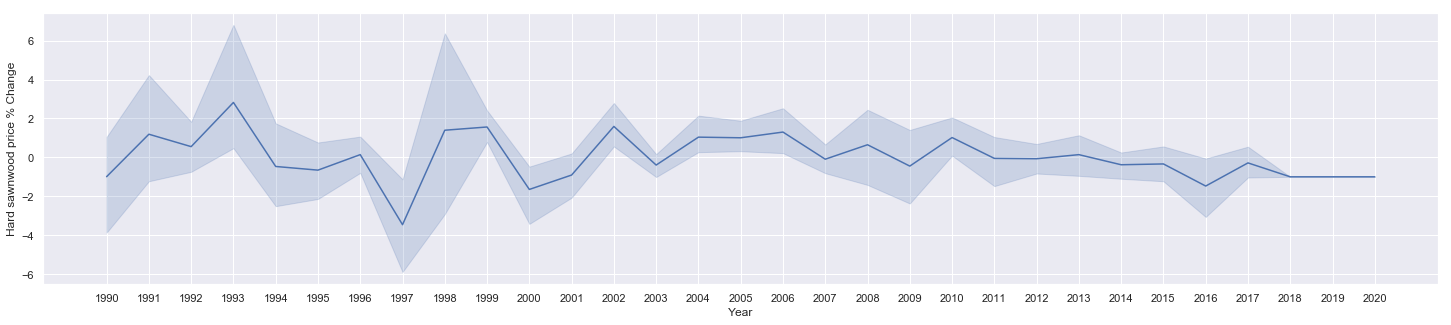

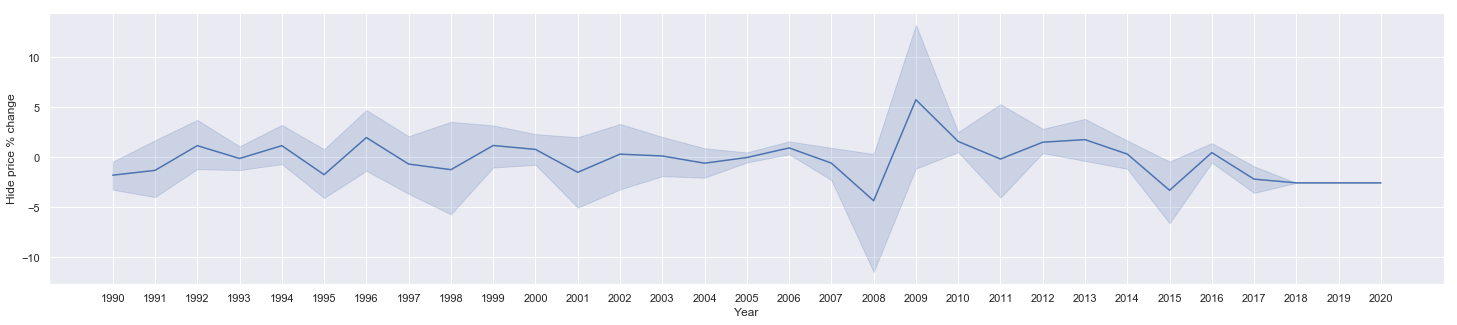

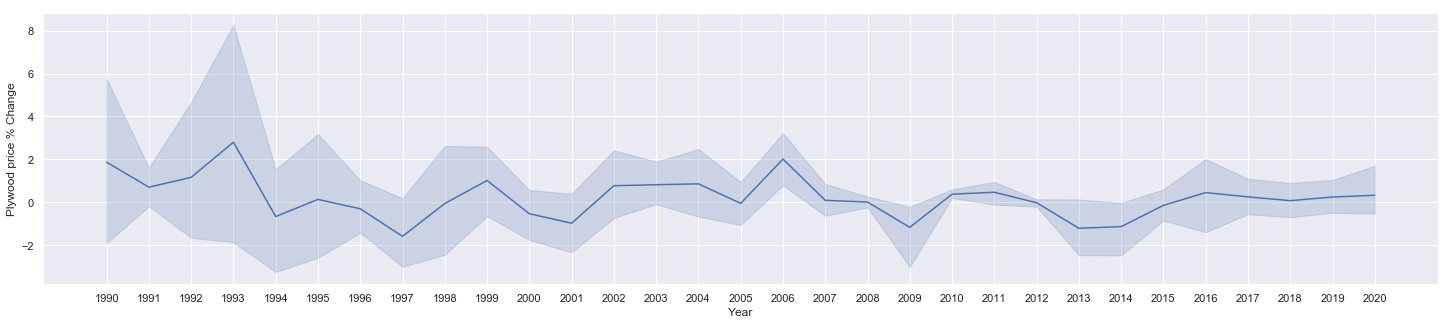

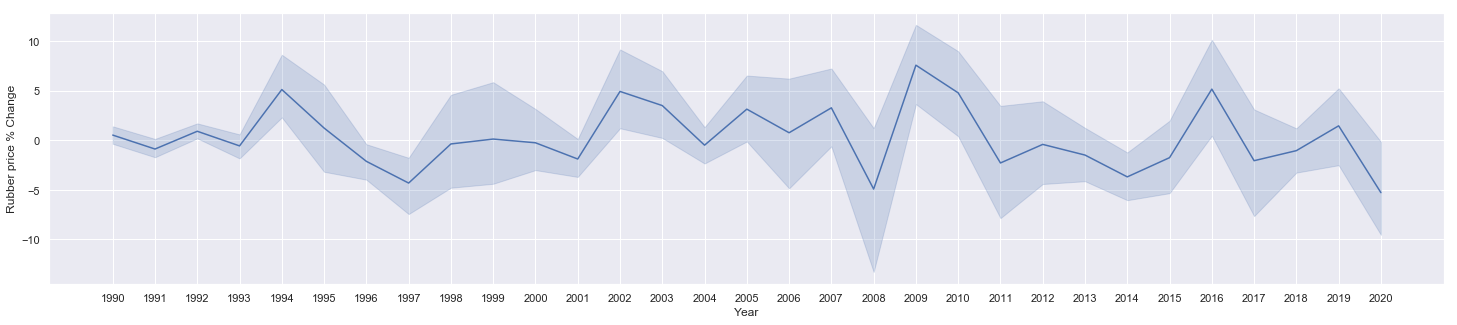

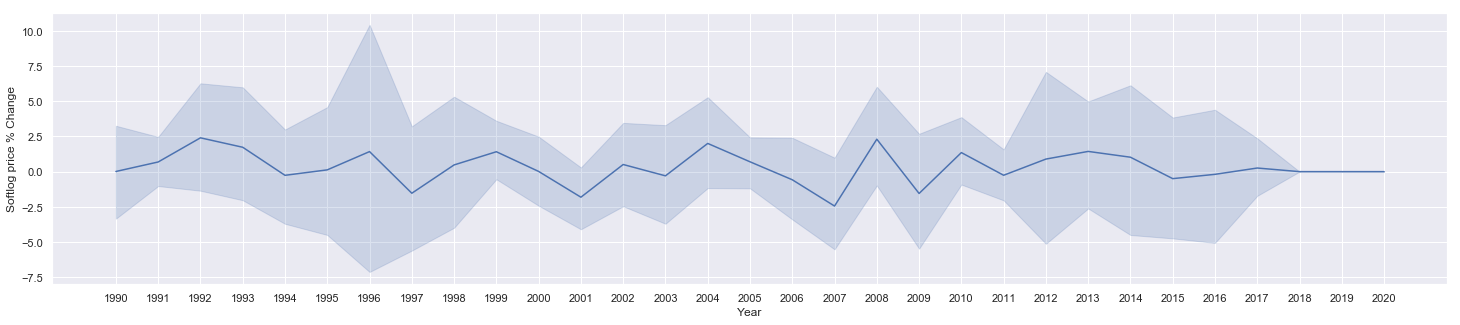

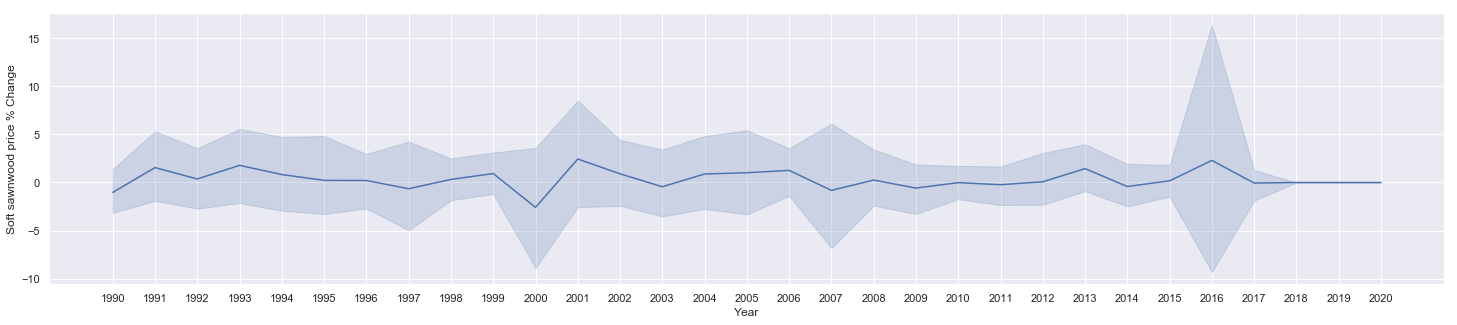

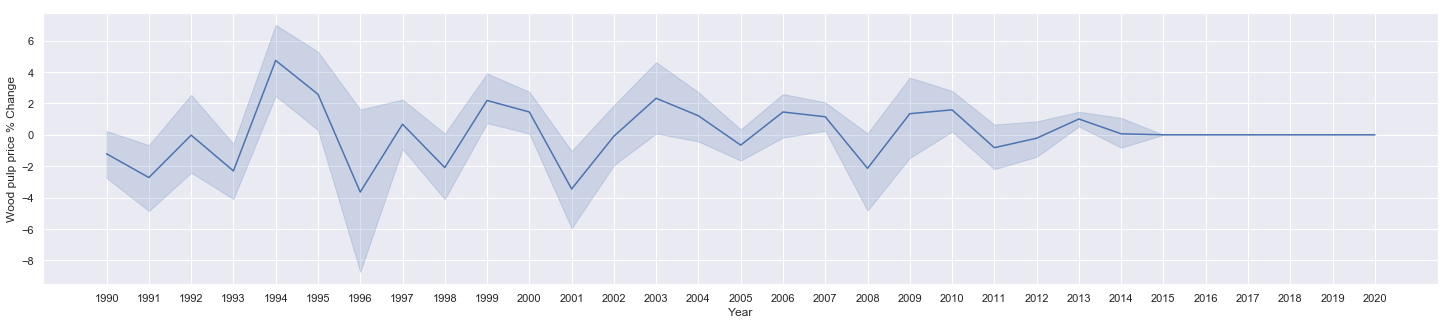

In [78]:
#Ploting change of percent each year of every crop
for col in cols2:
    plt.figure(figsize=(25,5))
    sns.lineplot(df['Year'],df[col])
    plt.show()